# Task 2: Regression Tsak

### Neccessary Libraries Imports:

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
from numpy import arange
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import math

### Task 2.1a: Mean Data Imputation

Intially as instructed we have used the sample mean data imputations for the missing data in our CandC dataset. we have also dorped the columns which were suggested to be not useful for prediction. although mean imputation is fast and easy way to deal with missing data it is not the best method. in the next section we have explained why it is not good technique comparitvely to KNN base imputation.

In [5]:
df = pd.read_csv('OrignalDataCrime.csv', na_values=['?']) #reading Data considering ? as missing values
df.drop(df.columns[[0,1, 2, 3,4]], axis = 1, inplace = True) #droping the columns which will not be used in predictions
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
# df.fillna(df.mean().round(1), inplace=True)  #Replacing the na values with mean of the colums
df.to_csv('CandC mean imputed.csv', index=False) #saving dataset with mean imputation as csv file

### Task 2.1b: KNN Imputation 

Intially as instructed we have used the sample mean imputation method but this method have one of the drawback that is when the number of missing values are very larger in the data set than replacing all those missing data with the same values leads to change in the shape of distribution and hence the standard deviation become smaller when compared before and after imputation. In this step we have chosen KNN imputation technique which works well on such type of data set where there are lot of missing data. KNN imputation fill up the missing values by copying the values from similar records in the same data set the similarity of the two attributes is determined using a distance function generally eucladiean distance is used. the drawback of such technique is that it is time consuming and takes longer time when dealing with large data set. Furthermore the selection of value of k is crucial to performance. In below step we have applied KNN imputation with k = 10. The prediciton results are compared after applying the regression model on both mean imputed data set and KNN imputed data sets in the following steps. 
Both of the data sets are available in the shared Github Repositery.

In [21]:
df = pd.read_csv('OrignalDataCrime.csv', na_values=['?']) #reading Data considering ? as missing values
df.drop(df.columns[[0,1, 2, 3,4]], axis = 1, inplace = True) #droping the columns which will not be used in predictions
# X = np.array(df)
# print(X)
imputer = KNNImputer(n_neighbors=10)
# imputer.fit_transform(X)
# X=np.array(df.iloc[:,:-1].values)
# Y = np.array(df.iloc[:,-1:].values)
# print(X)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df.to_csv('CandC knn imputed.csv', index=False)

### Task 2.2: Linear Regresion With Mean Data Set:


In this part I applied the linear Regression model on mean imputed dataset using 5 fold cross validation. The results show the coefficents of each parameter learnt along with the Mean Squared Error (MSE) and R2 Score for each fold. At the end we have displayed the average MSE and average R2 score achived over 5 different Folds.

Average MSE = 0.38323710881729534

Average RMSE = 0.6190614741827304

Average R2 Score = -6.657844688528575

In [22]:
df = pd.read_csv('CandC mean imputed.csv')
# df.fillna(df.mean().round(1), inplace=True)
# df.drop(df.columns[[0,1, 2, 3,4]], axis = 1, inplace = True)
xcol = df.iloc[:,:-1]
ycol = df.iloc[:,-1:]
X=np.array(df.iloc[:,:-1].values)
Y = np.array(df.iloc[:,-1:].values)
sum=0
sumr2=0
for i in range(1,6):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =i )
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(x_train, y_train)
    y_prediction =  linear_regressor.predict(x_test)
    score=r2_score(y_test,y_prediction)
    meansquarederror = mean_squared_error(y_test,y_prediction)
    sum = sum+meansquarederror
    sumr2 = sumr2 + score
    print('fold ',i,'MSE =',meansquarederror)
    print('fold ',i,'R2 Score=',score)
    print(f"intercept: {linear_regressor.intercept_}")
    parameters = linear_regressor.coef_
    print(parameters.shape)
    for idx, col_name in enumerate(xcol):
        print("The coefficient for {} is {}".format(col_name, linear_regressor.coef_[0][idx]))
#     print(f"coefficients: {linear_regressor.coef_}")
    
print('final mean squared error = ',sum/5)
print('final Root mean squared error = ',math.sqrt(sum/5))

print('final R2 score = ',sumr2/5)


fold  1 MSE = 0.02072196183917394
fold  1 R2 Score= 0.5950891906825643
intercept: [0.50335093]
(1, 122)
The coefficient for population is 0.14471207099833797
The coefficient for householdsize is 0.0009142116887205787
The coefficient for racepctblack is 0.21271218156238106
The coefficient for racePctWhite is -0.018429971075256124
The coefficient for racePctAsian is -0.021631375220485055
The coefficient for racePctHisp is 0.05574451781883272
The coefficient for agePct12t21 is 0.11101472020473648
The coefficient for agePct12t29 is -0.25775541284818054
The coefficient for agePct16t24 is -0.12322524849693775
The coefficient for agePct65up is 0.08481819818334717
The coefficient for numbUrban is -0.3142376518051152
The coefficient for pctUrban is 0.04726172709551263
The coefficient for medIncome is -0.2307971415101951
The coefficient for pctWWage is -0.1320511183997783
The coefficient for pctWFarmSelf is 0.03187958369968344
The coefficient for pctWInvInc is -0.22305319550249203
The coefficien

### Task 2.2: Linear Regresion with KNN Imputed Data set

In this part I applied the linear Regression model on KNN imputed dataset using 5 fold cross validation. The results show the coefficents of each parameter learnt along with the Mean Squared Error (MSE) and R2 Score for each fold. At the end we have displayed the average MSE and average R2 score achived over 5 different Folds.

Average MSE = 0.018623341835247824

Average RMSE = 0.13646736545873459

Average R2 Score = 0.6524031120067022

We can see significant improvment in prediction when we used KNN imputed data set. further exploration is given below

In [24]:
df = pd.read_csv('CandC knn imputed.csv')
# df.fillna(df.mean().round(1), inplace=True)
# df.drop(df.columns[[0,1, 2, 3,4]], axis = 1, inplace = True)
xcol = df.iloc[:,:-1]
ycol = df.iloc[:,-1:]
X=np.array(df.iloc[:,:-1].values)
Y = np.array(df.iloc[:,-1:].values)
sum=0
sumr2=0
for i in range(1,6):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =i )
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(x_train, y_train)
    y_prediction =  linear_regressor.predict(x_test)
    score=r2_score(y_test,y_prediction)
    meansquarederror = mean_squared_error(y_test,y_prediction)
    sum = sum+meansquarederror
    sumr2 = sumr2 + score
    print('fold ',i,'MSE =',meansquarederror)
    print('fold ',i,'R2 Score=',score)
    print(f"intercept: {linear_regressor.intercept_}")
    parameters = linear_regressor.coef_
    print(parameters.shape)
    for idx, col_name in enumerate(xcol):
        print("The coefficient for {} is {}".format(col_name, linear_regressor.coef_[0][idx]))
#     print(f"coefficients: {linear_regressor.coef_}")
    
print('final mean squared error = ',sum/5)
print('final Root mean squared error = ',math.sqrt(sum/5))

print('final R2 score = ',sumr2/5)


fold  1 MSE = 0.019556232344923274
fold  1 R2 Score= 0.6178677517389752
intercept: [1.04542009]
(1, 122)
The coefficient for population is 0.04621300410658969
The coefficient for householdsize is -0.02101011545304929
The coefficient for racepctblack is 0.14518025301260745
The coefficient for racePctWhite is 0.041413574307448325
The coefficient for racePctAsian is -0.034695356857508935
The coefficient for racePctHisp is 0.02411656641234272
The coefficient for agePct12t21 is 0.12278115918375163
The coefficient for agePct12t29 is -0.2196516560687889
The coefficient for agePct16t24 is -0.1532486116226893
The coefficient for agePct65up is 0.1572966106803907
The coefficient for numbUrban is -0.3089576941971395
The coefficient for pctUrban is 0.05213795597607205
The coefficient for medIncome is -0.23261293785163611
The coefficient for pctWWage is -0.10556949731051575
The coefficient for pctWFarmSelf is 0.0275180608756984
The coefficient for pctWInvInc is -0.21308867951681365
The coefficient f

### Comparisons of Results of Linear Regression over KNN and mean Imputed datasets.

The following graphs shows the average MSE, RMSE and R2 Scores over both data sets. where we can clearly see the imporvment in results when we used KNN as our imputation technique.

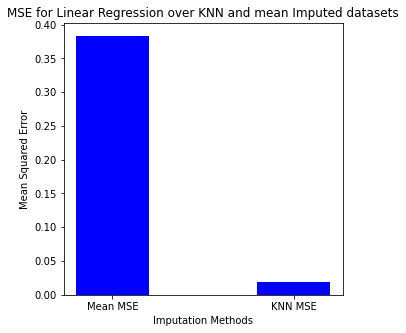

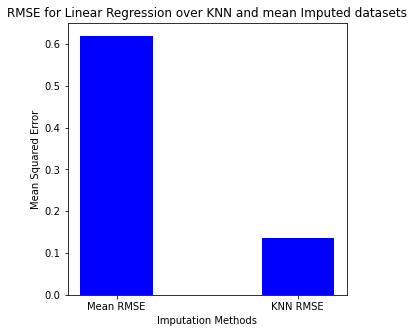

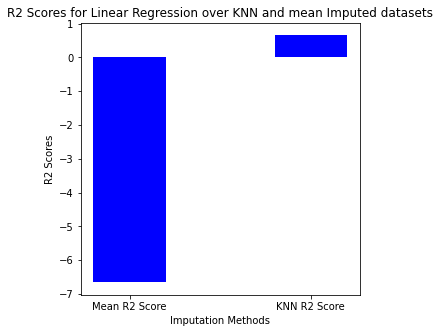

In [25]:
#MSE
data = {'Mean MSE':0.38323710881729534, 'KNN MSE':0.018623341835247824}
ImpTechnique = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(ImpTechnique, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Imputation Methods")
plt.ylabel("Mean Squared Error")
plt.title("MSE for Linear Regression over KNN and mean Imputed datasets")
plt.show()
# RMSE
data = {'Mean RMSE': 0.6190614741827304, 'KNN RMSE':0.13646736545873459}
ImpTechnique = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(ImpTechnique, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Imputation Methods")
plt.ylabel("Mean Squared Error")
plt.title("RMSE for Linear Regression over KNN and mean Imputed datasets")
plt.show()


data = {'Mean R2 Score': -6.657844688528575, 'KNN R2 Score':0.6524031120067022}
ImpTechnique = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(ImpTechnique, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Imputation Methods")
plt.ylabel("R2 Scores")
plt.title("R2 Scores for Linear Regression over KNN and mean Imputed datasets")
plt.show()

### Task 2.3: Ridge Regression with Mean Data Set:

In this step we apply the ridge regression technique for different values of λ. during our experiment we used 5 fold validation technique and values of λ ranges from 0 to 0.1 with increment of 0.01. The results show the learnt paramenters for each fold against each alpha values with average MSE, RMSE and r2 Scores. We also identified the best λ = 0.24 and shows the final results the best λ value give the following results given as.

Average MSE = 0.01883298151756549

Average RMSE = 0.13723331052468818

Average R2 Score = 0.6492543301718884

We can see significant improvment while using ridge regression over linear regression.

In [38]:
df = pd.read_csv('CandC mean imputed.csv')
# df.fillna(df.mean().round(1), inplace=True)
# df.drop(df.columns[[0,1, 2, 3,4]], axis = 1, inplace = True)
X=np.array(df.iloc[:,:-1].values)
Y = np.array(df.iloc[:,-1:].values)
xcol = df.iloc[:,:-1]
ycol = df.iloc[:,-1:]

MSEs = []
R2Scores = []

alphas=arange(0, 0.1, 0.02)
for a in alphas:
    sum=0
    sumr2=0
    for i in range(1,6):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
        ridge_model = Ridge(alpha = a).fit(x_train, y_train) # create object for the class
    #     ridge_model.fit(x_train, y_train)
        y_prediction =  ridge_model.predict(x_test)
        score=r2_score(y_test,y_prediction)
        meansquarederror = mean_squared_error(y_test,y_prediction)
        sum = sum+meansquarederror
        sumr2 = sumr2 + score
        print('alpha = ',a)
        print('fold ',i,'MSE =',meansquarederror)
        print('fold ',i,'R2 Score=',score)
        print(f"intercept: {ridge_model.intercept_}")
        parameters = ridge_model.coef_
#         print(parameters.shape)
        for idx, col_name in enumerate(xcol):
            print("The coefficient for {} is {}".format(col_name, ridge_model.coef_[0][idx]))
#         print(f"coefficients: {ridge_model.coef_}")

    print('final mean squared error = ',sum/5)
    MSEs.append(sum/5)
    print('final R2 score = ',sumr2/5)
    R2Scores.append(sumr2/5)
    print('\n\n\n')
    
print('MSEs = ',MSEs)
print('R2Scores = ',R2Scores)
print('\n\nbest MSEs =', min(MSEs))
print('best R2Score =',max(R2Scores))
bestR2Scpos = R2Scores.index(max(R2Scores))
bestMSEpos = MSEs.index(min(MSEs))
print('\n\n  best MSEs alpha =', alphas[bestMSEpos])
print('\n\n  best R2Scores alpha =', alphas[bestMSEpos])

sum=0
sumr2=0
for i in range(1,6):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
    ridge_model = Ridge(alpha = alphas[bestMSEpos]).fit(x_train, y_train) # create object for the class
    #     ridge_model.fit(x_train, y_train)
    y_prediction =  ridge_model.predict(x_test)
    score=r2_score(y_test,y_prediction)
    meansquarederror = mean_squared_error(y_test,y_prediction)
    sum = sum+meansquarederror
    sumr2 = sumr2 + score
    print('alpha = ',a)
    print('fold ',i,'MSE =',meansquarederror)
    print('fold ',i,'R2 Score=',score)
    print(f"intercept: {ridge_model.intercept_}")
    parameters = ridge_model.coef_
#         print(parameters.shape)
    for idx, col_name in enumerate(xcol):
        print("The coefficient for {} is {}".format(col_name, ridge_model.coef_[0][idx]))
    print('final mean squared error = ',sum/5)
    print('final Root mean squared error = ',math.sqrt(sum/5))
#     MSEs.append(sum/5)
    print('final R2 score = ',sumr2/5)


alpha =  0.0
fold  1 MSE = 0.020721961839140806
fold  1 R2 Score= 0.5950891906832116
intercept: [0.50335093]
The coefficient for population is 0.14471207098964292
The coefficient for householdsize is 0.0009142116911376678
The coefficient for racepctblack is 0.21271218156298263
The coefficient for racePctWhite is -0.018429971076226157
The coefficient for racePctAsian is -0.021631375220531875
The coefficient for racePctHisp is 0.055744517819107005
The coefficient for agePct12t21 is 0.11101472020325862
The coefficient for agePct12t29 is -0.2577554128440946
The coefficient for agePct16t24 is -0.12322524850039165
The coefficient for agePct65up is 0.08481819818464684
The coefficient for numbUrban is -0.3142376518036232
The coefficient for pctUrban is 0.047261727095467075
The coefficient for medIncome is -0.2307971415026079
The coefficient for pctWWage is -0.13205111840275247
The coefficient for pctWFarmSelf is 0.03187958369911011
The coefficient for pctWInvInc is -0.22305319550271163
The coe

The coefficient for medFamInc is 0.3124166437521126
The coefficient for perCapInc is 0.1892119274310302
The coefficient for whitePerCap is -0.47469283396140727
The coefficient for blackPerCap is -0.02331736824393132
The coefficient for indianPerCap is -0.037470995028782456
The coefficient for AsianPerCap is 0.050443390047873085
The coefficient for OtherPerCap is 0.05049093532814329
The coefficient for HispPerCap is 0.012635476622793755
The coefficient for NumUnderPov is 0.05662663133729115
The coefficient for PctPopUnderPov is -0.19265371854565055
The coefficient for PctLess9thGrade is -0.11773988422290711
The coefficient for PctNotHSGrad is 0.029052666634648262
The coefficient for PctBSorMore is -0.010082841194178805
The coefficient for PctUnemployed is 0.029105697715144124
The coefficient for PctEmploy is 0.2829838410487978
The coefficient for PctEmplManu is -0.06940341042066725
The coefficient for PctEmplProfServ is -0.03625613400319316
The coefficient for PctOccupManu is 0.05944413

The coefficient for PctPersDenseHous is 0.1557613828596222
The coefficient for PctHousLess3BR is 0.05061768963025821
The coefficient for MedNumBR is 0.009174305903397231
The coefficient for HousVacant is 0.12332209954089562
The coefficient for PctHousOccup is -0.06429417974832537
The coefficient for PctHousOwnOcc is 0.2581061274293471
The coefficient for PctVacantBoarded is 0.06225147879121683
The coefficient for PctVacMore6Mos is -0.08927206628965961
The coefficient for MedYrHousBuilt is -0.007167453649407994
The coefficient for PctHousNoPhone is 0.026189250393495806
The coefficient for PctWOFullPlumb is -0.01667541589456673
The coefficient for OwnOccLowQuart is -0.1711682082814536
The coefficient for OwnOccMedVal is 0.07540358440344777
The coefficient for OwnOccHiQuart is 0.06204179661357746
The coefficient for RentLowQ is -0.23536569632414478
The coefficient for RentMedian is -0.03859077258935826
The coefficient for RentHighQ is -0.07997211328181904
The coefficient for MedRent is 0.

alpha =  0.08
fold  5 MSE = 0.02038530429088165
fold  5 R2 Score= 0.6698289741042389
intercept: [0.74122116]
The coefficient for population is -0.03109664196455983
The coefficient for householdsize is 0.030634356174688102
The coefficient for racepctblack is 0.13396257317510424
The coefficient for racePctWhite is -0.08562888576644855
The coefficient for racePctAsian is -0.032867628687907574
The coefficient for racePctHisp is 0.058813995843672
The coefficient for agePct12t21 is 0.08842010216409273
The coefficient for agePct12t29 is -0.33369568639497443
The coefficient for agePct16t24 is -0.04640915342338504
The coefficient for agePct65up is -0.02979017277685647
The coefficient for numbUrban is -0.02003273234920738
The coefficient for pctUrban is 0.04690538656413633
The coefficient for medIncome is -0.02420826015296918
The coefficient for pctWWage is -0.1774498599662176
The coefficient for pctWFarmSelf is 0.04253955793226509
The coefficient for pctWInvInc is -0.2240449258684108
The coeffi

### Comparison of average MSE over Different λ values:

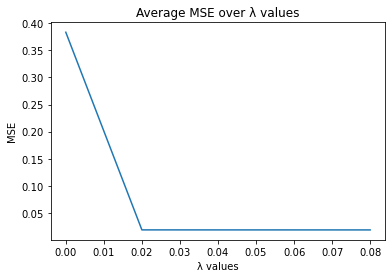

In [37]:
plt.plot(alphas,MSEs)
plt.title('Average MSE over λ values')
plt.xlabel('λ values')
plt.ylabel('MSE')
plt.show()

### 2.3 Ridge Regression with KNN Imputed Data set:

After applying the same analysis using ridge regression on KNN imputed data set we get the following results.

Average MSE = 0.01821030617950202

Average RMSE = 0.13494556746889474

Average R2 Score = 0.6606450706430328

In [39]:
df = pd.read_csv('CandC knn imputed.csv')
# df.fillna(df.mean().round(1), inplace=True)
# df.drop(df.columns[[0,1, 2, 3,4]], axis = 1, inplace = True)
X=np.array(df.iloc[:,:-1].values)
Y = np.array(df.iloc[:,-1:].values)
xcol = df.iloc[:,:-1]
ycol = df.iloc[:,-1:]

MSEs = []
R2Scores = []

alphas=arange(0, 0.5, 0.01)
for a in alphas:
    sum=0
    sumr2=0
    for i in range(1,6):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
        ridge_model = Ridge(alpha = a).fit(x_train, y_train) # create object for the class
    #     ridge_model.fit(x_train, y_train)
        y_prediction =  ridge_model.predict(x_test)
        score=r2_score(y_test,y_prediction)
        meansquarederror = mean_squared_error(y_test,y_prediction)
        sum = sum+meansquarederror
        sumr2 = sumr2 + score
        print('alpha = ',a)
        print('fold ',i,'MSE =',meansquarederror)
        print('fold ',i,'R2 Score=',score)
        print(f"intercept: {ridge_model.intercept_}")
        parameters = ridge_model.coef_
#         print(parameters.shape)
        for idx, col_name in enumerate(xcol):
            print("The coefficient for {} is {}".format(col_name, ridge_model.coef_[0][idx]))
#         print(f"coefficients: {ridge_model.coef_}")

    print('final mean squared error = ',sum/5)
    MSEs.append(sum/5)
    print('final R2 score = ',sumr2/5)
    R2Scores.append(sumr2/5)
    print('\n\n\n')
    
print('MSEs = ',MSEs)
print('R2Scores = ',R2Scores)
print('\n\nbest MSEs =', min(MSEs))
print('best R2Score =',max(R2Scores))
bestR2Scpos = R2Scores.index(max(R2Scores))
bestMSEpos = MSEs.index(min(MSEs))
print('\n\n  best MSEs alpha =', alphas[bestMSEpos])
print('\n\n  best R2Scores alpha =', alphas[bestMSEpos])

sum=0
sumr2=0
for i in range(1,6):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
    ridge_model = Ridge(alpha = alphas[bestMSEpos]).fit(x_train, y_train) # create object for the class
    #     ridge_model.fit(x_train, y_train)
    y_prediction =  ridge_model.predict(x_test)
    score=r2_score(y_test,y_prediction)
    meansquarederror = mean_squared_error(y_test,y_prediction)
    sum = sum+meansquarederror
    sumr2 = sumr2 + score
    print('alpha = ',a)
    print('fold ',i,'MSE =',meansquarederror)
    print('fold ',i,'R2 Score=',score)
    print(f"intercept: {ridge_model.intercept_}")
    parameters = ridge_model.coef_
#         print(parameters.shape)
    for idx, col_name in enumerate(xcol):
        print("The coefficient for {} is {}".format(col_name, ridge_model.coef_[0][idx]))
    print('final mean squared error = ',sum/5)
    print('final Root mean squared error = ',math.sqrt(sum/5))
#     MSEs.append(sum/5)
    print('final R2 score = ',sumr2/5)

alpha =  0.0
fold  1 MSE = 0.01955623234492651
fold  1 R2 Score= 0.617867751738912
intercept: [1.04542009]
The coefficient for population is 0.04621300410703936
The coefficient for householdsize is -0.02101011545333237
The coefficient for racepctblack is 0.14518025301270407
The coefficient for racePctWhite is 0.041413574307797
The coefficient for racePctAsian is -0.03469535685759027
The coefficient for racePctHisp is 0.024116566412158272
The coefficient for agePct12t21 is 0.12278115918396407
The coefficient for agePct12t29 is -0.219651656070004
The coefficient for agePct16t24 is -0.1532486116217789
The coefficient for agePct65up is 0.1572966106802891
The coefficient for numbUrban is -0.3089576941966906
The coefficient for pctUrban is 0.052137955976074894
The coefficient for medIncome is -0.23261293785291767
The coefficient for pctWWage is -0.10556949731024128
The coefficient for pctWFarmSelf is 0.02751806087577798
The coefficient for pctWInvInc is -0.21308867951673555
The coefficient f

alpha =  0.01
fold  5 MSE = 0.01954711501717264
fold  5 R2 Score= 0.6834047249709607
intercept: [0.68355371]
The coefficient for population is -0.13706651240097315
The coefficient for householdsize is 0.0056151325361060754
The coefficient for racepctblack is 0.08321074842200304
The coefficient for racePctWhite is -0.01919003952694367
The coefficient for racePctAsian is -0.045158731506085924
The coefficient for racePctHisp is 0.037995708366807164
The coefficient for agePct12t21 is 0.1068369403931704
The coefficient for agePct12t29 is -0.3006797710016153
The coefficient for agePct16t24 is -0.1037281143520572
The coefficient for agePct65up is 0.013804232764451725
The coefficient for numbUrban is -0.025210835116264513
The coefficient for pctUrban is 0.050557124568868336
The coefficient for medIncome is -0.09640500344624232
The coefficient for pctWWage is -0.1634507153811222
The coefficient for pctWFarmSelf is 0.03827890707478559
The coefficient for pctWInvInc is -0.21401136973583798
The co

alpha =  0.04
fold  1 MSE = 0.019550432092436218
fold  1 R2 Score= 0.6179810897012303
intercept: [0.5531221]
The coefficient for population is -0.007237273057343537
The coefficient for householdsize is -0.018424811657018456
The coefficient for racepctblack is 0.14909338043962758
The coefficient for racePctWhite is 0.046107422327352786
The coefficient for racePctAsian is -0.03144577711512229
The coefficient for racePctHisp is 0.03039609088364675
The coefficient for agePct12t21 is 0.11104968586729311
The coefficient for agePct12t29 is -0.23520378872297631
The coefficient for agePct16t24 is -0.12423107304121103
The coefficient for agePct65up is 0.1467223391539028
The coefficient for numbUrban is -0.22060309030985734
The coefficient for pctUrban is 0.049037693562478696
The coefficient for medIncome is -0.16388366140804947
The coefficient for pctWWage is -0.10529140587883452
The coefficient for pctWFarmSelf is 0.027620093231366435
The coefficient for pctWInvInc is -0.21213328147411567
The c

alpha =  0.05
fold  4 MSE = 0.01567955566815331
fold  4 R2 Score= 0.6855929660104894
intercept: [0.93879372]
The coefficient for population is 0.020650919723661294
The coefficient for householdsize is -0.04316043587080496
The coefficient for racepctblack is 0.14407921124110834
The coefficient for racePctWhite is 0.0686711170536282
The coefficient for racePctAsian is -0.03506374221496923
The coefficient for racePctHisp is 0.05076164713674208
The coefficient for agePct12t21 is 0.10805351865245412
The coefficient for agePct12t29 is -0.2865974327922784
The coefficient for agePct16t24 is -0.09000603087299983
The coefficient for agePct65up is 0.06868460130416089
The coefficient for numbUrban is -0.17145924755586076
The coefficient for pctUrban is 0.051483660317390434
The coefficient for medIncome is -0.10470822165103943
The coefficient for pctWWage is -0.09479364371275535
The coefficient for pctWFarmSelf is 0.03732651696590413
The coefficient for pctWInvInc is -0.2082076457452298
The coeffic

alpha =  0.07
fold  5 MSE = 0.01954390938423337
fold  5 R2 Score= 0.6834566450748307
intercept: [0.66951505]
The coefficient for population is -0.08600021445358194
The coefficient for householdsize is 0.01629803630079807
The coefficient for racepctblack is 0.08610578414909614
The coefficient for racePctWhite is -0.01655277865184811
The coefficient for racePctAsian is -0.04443576859809422
The coefficient for racePctHisp is 0.048172346364009314
The coefficient for agePct12t21 is 0.08709048399462722
The coefficient for agePct12t29 is -0.29754861976377656
The coefficient for agePct16t24 is -0.08111820026727956
The coefficient for agePct65up is 0.006365506069036751
The coefficient for numbUrban is -0.054132345934233085
The coefficient for pctUrban is 0.05219896752323368
The coefficient for medIncome is -0.03558522171128929
The coefficient for pctWWage is -0.16109332135517732
The coefficient for pctWFarmSelf is 0.038526459851131435
The coefficient for pctWInvInc is -0.21166627111335895
The c

The coefficient for MalePctNevMarr is 0.14487865518783863
The coefficient for FemalePctDiv is -0.09884815294225058
The coefficient for TotalPctDiv is -0.042563375926355514
The coefficient for PersPerFam is -0.0002692817522008555
The coefficient for PctFam2Par is 0.025880917131604255
The coefficient for PctKids2Par is -0.350981745560697
The coefficient for PctYoungKids2Par is -0.0068623000201403815
The coefficient for PctTeen2Par is 0.005031862124241961
The coefficient for PctWorkMomYoungKids is 0.09431148594206298
The coefficient for PctWorkMom is -0.18771267320877716
The coefficient for NumIlleg is -0.18979248480266278
The coefficient for PctIlleg is 0.12285712166592314
The coefficient for NumImmig is -0.08494078980083801
The coefficient for PctImmigRecent is 0.004922055842619523
The coefficient for PctImmigRec5 is 0.04369250704085966
The coefficient for PctImmigRec8 is -0.12224728719459436
The coefficient for PctImmigRec10 is 0.07537716895447034
The coefficient for PctRecentImmig is 

alpha =  0.11
fold  2 MSE = 0.018561134330777218
fold  2 R2 Score= 0.6470410927891079
intercept: [0.87581005]
The coefficient for population is -0.04377224362785759
The coefficient for householdsize is 0.016194891138936872
The coefficient for racepctblack is 0.12622327448074686
The coefficient for racePctWhite is 0.004382117836867011
The coefficient for racePctAsian is -0.03769865366730554
The coefficient for racePctHisp is 0.023609477054793094
The coefficient for agePct12t21 is 0.11969892916169413
The coefficient for agePct12t29 is -0.21679570630202766
The coefficient for agePct16t24 is -0.1559714818777159
The coefficient for agePct65up is 0.0881480767645895
The coefficient for numbUrban is -0.15062935705640018
The coefficient for pctUrban is 0.04208405539510819
The coefficient for medIncome is -0.13059960567988438
The coefficient for pctWWage is -0.11140812073491879
The coefficient for pctWFarmSelf is 0.03814663420242558
The coefficient for pctWInvInc is -0.13509078612984815
The coef

alpha =  0.12
fold  5 MSE = 0.019583577717280306
fold  5 R2 Score= 0.6828141560527983
intercept: [0.68145025]
The coefficient for population is -0.07198242231842973
The coefficient for householdsize is 0.02287580698324858
The coefficient for racepctblack is 0.0871990280639618
The coefficient for racePctWhite is -0.01579060396572996
The coefficient for racePctAsian is -0.04459644300367842
The coefficient for racePctHisp is 0.052211713230641575
The coefficient for agePct12t21 is 0.07781780928411296
The coefficient for agePct12t29 is -0.2891063037878704
The coefficient for agePct16t24 is -0.07070952813155154
The coefficient for agePct65up is 0.007237260918319029
The coefficient for numbUrban is -0.05624161630447867
The coefficient for pctUrban is 0.0526293078842381
The coefficient for medIncome is -0.008093942477687747
The coefficient for pctWWage is -0.15762649665476686
The coefficient for pctWFarmSelf is 0.038366666501606334
The coefficient for pctWInvInc is -0.20982253268113957
The coe

alpha =  0.14
fold  4 MSE = 0.015615720861901588
fold  4 R2 Score= 0.686872983921945
intercept: [0.72873914]
The coefficient for population is -0.007746918765897167
The coefficient for householdsize is -0.02556946778445321
The coefficient for racepctblack is 0.14201466278903915
The coefficient for racePctWhite is 0.06362273849301524
The coefficient for racePctAsian is -0.036133630619863154
The coefficient for racePctHisp is 0.05987429319502843
The coefficient for agePct12t21 is 0.0899197351084003
The coefficient for agePct12t29 is -0.27386056017241717
The coefficient for agePct16t24 is -0.06951755734549037
The coefficient for agePct65up is 0.0685266366898748
The coefficient for numbUrban is -0.12037198698001846
The coefficient for pctUrban is 0.050673237393220445
The coefficient for medIncome is -0.026939190681483958
The coefficient for pctWWage is -0.0897726620683646
The coefficient for pctWFarmSelf is 0.03677073196121846
The coefficient for pctWInvInc is -0.20572550119310534
The coef

alpha =  0.16
fold  2 MSE = 0.01852094827866145
fold  2 R2 Score= 0.6478052715718875
intercept: [0.83240915]
The coefficient for population is -0.05013541285168158
The coefficient for householdsize is 0.020020031138085963
The coefficient for racepctblack is 0.12633827056202465
The coefficient for racePctWhite is 0.005840655371932756
The coefficient for racePctAsian is -0.03831757920591591
The coefficient for racePctHisp is 0.028361635143092676
The coefficient for agePct12t21 is 0.10660577412572847
The coefficient for agePct12t29 is -0.21632555790899646
The coefficient for agePct16t24 is -0.13519988540706274
The coefficient for agePct65up is 0.0868633250969086
The coefficient for numbUrban is -0.1347143434479109
The coefficient for pctUrban is 0.0417515367718581
The coefficient for medIncome is -0.09314677437302174
The coefficient for pctWWage is -0.108572402108803
The coefficient for pctWFarmSelf is 0.03729357645182272
The coefficient for pctWInvInc is -0.13678707284712446
The coeffici

alpha =  0.18
fold  3 MSE = 0.01809693626999711
fold  3 R2 Score= 0.6619241253745307
intercept: [0.56892736]
The coefficient for population is -0.022564338756314185
The coefficient for householdsize is 0.0468255172280246
The coefficient for racepctblack is 0.10426277225863932
The coefficient for racePctWhite is 0.025084272694481463
The coefficient for racePctAsian is -0.03921090965820297
The coefficient for racePctHisp is 0.04615924372273282
The coefficient for agePct12t21 is 0.047664732196793146
The coefficient for agePct12t29 is -0.17834381620537865
The coefficient for agePct16t24 is -0.07424118962486627
The coefficient for agePct65up is 0.01747922250142005
The coefficient for numbUrban is -0.05352106644509947
The coefficient for pctUrban is 0.04370034572294832
The coefficient for medIncome is -0.019337977402357473
The coefficient for pctWWage is -0.15999792678874616
The coefficient for pctWFarmSelf is 0.06220025023812305
The coefficient for pctWInvInc is -0.1560902864630993
The coef

The coefficient for agePct16t24 is -0.12267531645865515
The coefficient for agePct65up is 0.08623276353250887
The coefficient for numbUrban is -0.12554553860065845
The coefficient for pctUrban is 0.04156236802248003
The coefficient for medIncome is -0.07087911779403304
The coefficient for pctWWage is -0.10633861370431479
The coefficient for pctWFarmSelf is 0.03667123974798671
The coefficient for pctWInvInc is -0.13757637374852494
The coefficient for pctWSocSec is 0.08903601490645185
The coefficient for pctWPubAsst is 0.012035295203849926
The coefficient for pctWRetire is -0.10347573011796526
The coefficient for medFamInc is 0.26417532465791793
The coefficient for perCapInc is 0.05790861927824497
The coefficient for whitePerCap is -0.3811177213121498
The coefficient for blackPerCap is -0.015448789036802583
The coefficient for indianPerCap is -0.029463308529324307
The coefficient for AsianPerCap is 0.05273148730904362
The coefficient for OtherPerCap is 0.04308661826633323
The coefficient

The coefficient for racePctHisp is 0.05610092537320987
The coefficient for agePct12t21 is 0.06636794785825993
The coefficient for agePct12t29 is -0.2712490138736172
The coefficient for agePct16t24 is -0.05998334825490416
The coefficient for agePct65up is 0.010951689122786932
The coefficient for numbUrban is -0.05417898138740385
The coefficient for pctUrban is 0.05294476019658886
The coefficient for medIncome is 0.019901376878167894
The coefficient for pctWWage is -0.1517410934512382
The coefficient for pctWFarmSelf is 0.03794224602371951
The coefficient for pctWInvInc is -0.20594785017067857
The coefficient for pctWSocSec is 0.11633671909109658
The coefficient for pctWPubAsst is -0.0384777133884575
The coefficient for pctWRetire is -0.05914357366496083
The coefficient for medFamInc is 0.1281901538559981
The coefficient for perCapInc is 0.012589231662320134
The coefficient for whitePerCap is -0.2673577828409408
The coefficient for blackPerCap is -0.026576899675821723
The coefficient for

alpha =  0.23
fold  4 MSE = 0.015590729551830867
fold  4 R2 Score= 0.6873741106018806
intercept: [0.66006187]
The coefficient for population is -0.0166215415025168
The coefficient for householdsize is -0.014315131895536405
The coefficient for racepctblack is 0.13980204972480817
The coefficient for racePctWhite is 0.05888144743886632
The coefficient for racePctAsian is -0.03747703366627893
The coefficient for racePctHisp is 0.0638811500902747
The coefficient for agePct12t21 is 0.07872275881542594
The coefficient for agePct12t29 is -0.25776876462932974
The coefficient for agePct16t24 is -0.059541557131380166
The coefficient for agePct65up is 0.07039895288116657
The coefficient for numbUrban is -0.0970194739924987
The coefficient for pctUrban is 0.05042839675394099
The coefficient for medIncome is 0.009612329018986353
The coefficient for pctWWage is -0.08521742672350292
The coefficient for pctWFarmSelf is 0.03609500920879843
The coefficient for pctWInvInc is -0.20189746811046505
The coeff

final mean squared error =  0.018274609697604603
final R2 score =  0.6595273285663774




alpha =  0.25
fold  1 MSE = 0.01948884597299475
fold  1 R2 Score= 0.6191844933972367
intercept: [0.47734883]
The coefficient for population is -0.05346014128100244
The coefficient for householdsize is 0.0068749359292833625
The coefficient for racepctblack is 0.14928383049152388
The coefficient for racePctWhite is 0.04565372243611095
The coefficient for racePctAsian is -0.030423000089073903
The coefficient for racePctHisp is 0.0411481920344038
The coefficient for agePct12t21 is 0.08062567001593586
The coefficient for agePct12t29 is -0.2280538702761137
The coefficient for agePct16t24 is -0.07525885113883551
The coefficient for agePct65up is 0.13835911616492944
The coefficient for numbUrban is -0.1242323675744635
The coefficient for pctUrban is 0.04606069826122839
The coefficient for medIncome is -0.02982352782977447
The coefficient for pctWWage is -0.09249179696326001
The coefficient for pctWFarmSel

alpha =  0.26
fold  5 MSE = 0.01969205674808468
fold  5 R2 Score= 0.6810571730626116
intercept: [0.67853494]
The coefficient for population is -0.05535250499874249
The coefficient for householdsize is 0.03432018653092133
The coefficient for racepctblack is 0.08821854562262685
The coefficient for racePctWhite is -0.016406227258528267
The coefficient for racePctAsian is -0.04507240026965987
The coefficient for racePctHisp is 0.057339813896275495
The coefficient for agePct12t21 is 0.06154641374338215
The coefficient for agePct12t29 is -0.2614336548283615
The coefficient for agePct16t24 is -0.05625485907577961
The coefficient for agePct65up is 0.013052542058668149
The coefficient for numbUrban is -0.05247883243046119
The coefficient for pctUrban is 0.05301805538674267
The coefficient for medIncome is 0.029076818399178455
The coefficient for pctWWage is -0.14872786852263364
The coefficient for pctWFarmSelf is 0.03768772252781484
The coefficient for pctWInvInc is -0.20362210189376745
The coe

alpha =  0.28
fold  3 MSE = 0.018169876118762196
fold  3 R2 Score= 0.6605615078132815
intercept: [0.5399618]
The coefficient for population is -0.02261531496988736
The coefficient for householdsize is 0.05064148401940424
The coefficient for racepctblack is 0.10444598479847574
The coefficient for racePctWhite is 0.021167549206560853
The coefficient for racePctAsian is -0.03911753765308767
The coefficient for racePctHisp is 0.048796968304310184
The coefficient for agePct12t21 is 0.03847717703287347
The coefficient for agePct12t29 is -0.1693471837669668
The coefficient for agePct16t24 is -0.06280380280879122
The coefficient for agePct65up is 0.019155265738130183
The coefficient for numbUrban is -0.04565762656834303
The coefficient for pctUrban is 0.043651940441678166
The coefficient for medIncome is 0.009432100859266672
The coefficient for pctWWage is -0.1508023061958542
The coefficient for pctWFarmSelf is 0.06131784035782987
The coefficient for pctWInvInc is -0.1542018488312546
The coeff

The coefficient for MedYrHousBuilt is -0.026300581061527557
The coefficient for PctHousNoPhone is 0.0007258213045604193
The coefficient for PctWOFullPlumb is -0.022515740256900414
The coefficient for OwnOccLowQuart is -0.13975274160694018
The coefficient for OwnOccMedVal is -0.0029649880271194738
The coefficient for OwnOccHiQuart is 0.08843827971271098
The coefficient for RentLowQ is -0.2242831649173051
The coefficient for RentMedian is 0.007519746620414475
The coefficient for RentHighQ is -0.04293672950330659
The coefficient for MedRent is 0.2724898360084918
The coefficient for MedRentPctHousInc is 0.032249292570890924
The coefficient for MedOwnCostPctInc is -0.030102028719554027
The coefficient for MedOwnCostPctIncNoMtg is -0.061014497708626395
The coefficient for NumInShelters is 0.1715967265453222
The coefficient for NumStreet is 0.15403082025285986
The coefficient for PctForeignBorn is 0.08533830996411215
The coefficient for PctBornSameState is -0.0003814057981706378
The coefficie

The coefficient for MedOwnCostPctInc is -0.03811400031460194
The coefficient for MedOwnCostPctIncNoMtg is -0.0640746809112956
The coefficient for NumInShelters is 0.02913759451494202
The coefficient for NumStreet is 0.1796344130153543
The coefficient for PctForeignBorn is 0.08457758898684441
The coefficient for PctBornSameState is -0.0007374961059694591
The coefficient for PctSameHouse85 is -0.0253278299558367
The coefficient for PctSameCity85 is 0.029599955780609487
The coefficient for PctSameState85 is 0.0065667883325503055
The coefficient for LemasSwornFT is 0.015206837406480619
The coefficient for LemasSwFTPerPop is 0.0022850144671760137
The coefficient for LemasSwFTFieldOps is -0.06911513559596767
The coefficient for LemasSwFTFieldPerPop is 0.1996373715637217
The coefficient for LemasTotalReq is -0.2855560710448261
The coefficient for LemasTotReqPerPop is 0.05713666503107735
The coefficient for PolicReqPerOffic is 0.20975999088938574
The coefficient for PolicPerPop is 0.0099455406

fold  1 R2 Score= 0.6192247879104099
intercept: [0.4752466]
The coefficient for population is -0.05536791747806442
The coefficient for householdsize is 0.011853151006552688
The coefficient for racepctblack is 0.14779502523669466
The coefficient for racePctWhite is 0.043163238080712554
The coefficient for racePctAsian is -0.030817805754719353
The coefficient for racePctHisp is 0.04233119032533247
The coefficient for agePct12t21 is 0.07320628425577277
The coefficient for agePct12t29 is -0.21977482526077785
The coefficient for agePct16t24 is -0.06723280613451631
The coefficient for agePct65up is 0.1353074413641853
The coefficient for numbUrban is -0.11226282402529099
The coefficient for pctUrban is 0.04566602665357318
The coefficient for medIncome is -0.012132158590317854
The coefficient for pctWWage is -0.08872544233309798
The coefficient for pctWFarmSelf is 0.023098781710817317
The coefficient for pctWInvInc is -0.20444914906182746
The coefficient for pctWSocSec is 0.09668503905584466
T

alpha =  0.34
fold  5 MSE = 0.019742203359822255
fold  5 R2 Score= 0.6802449723710577
intercept: [0.67090342]
The coefficient for population is -0.05049556070628605
The coefficient for householdsize is 0.038209769745273334
The coefficient for racepctblack is 0.08831949635196948
The coefficient for racePctWhite is -0.017448980833505507
The coefficient for racePctAsian is -0.04523395789654527
The coefficient for racePctHisp is 0.05859820611599666
The coefficient for agePct12t21 is 0.05518042529816796
The coefficient for agePct12t29 is -0.24669792608428256
The coefficient for agePct16t24 is -0.051975275159189635
The coefficient for agePct65up is 0.016035664132651107
The coefficient for numbUrban is -0.049826056261006335
The coefficient for pctUrban is 0.05306606334071614
The coefficient for medIncome is 0.038611254637398805
The coefficient for pctWWage is -0.14422710777735068
The coefficient for pctWFarmSelf is 0.037278200521756094
The coefficient for pctWInvInc is -0.19982166877260688
Th

The coefficient for pctWPubAsst is 0.004049369050338314
The coefficient for pctWRetire is -0.10087603089509445
The coefficient for medFamInc is 0.10331963121642426
The coefficient for perCapInc is 0.01599726230218992
The coefficient for whitePerCap is -0.23511643400185295
The coefficient for blackPerCap is -0.026569433368232025
The coefficient for indianPerCap is -0.0336219160548611
The coefficient for AsianPerCap is 0.014105132852080886
The coefficient for OtherPerCap is 0.02989429646510461
The coefficient for HispPerCap is 0.04746881320008113
The coefficient for NumUnderPov is 0.057662019374624195
The coefficient for PctPopUnderPov is -0.21321339425853786
The coefficient for PctLess9thGrade is -0.05514105071152403
The coefficient for PctNotHSGrad is 0.009454942332408917
The coefficient for PctBSorMore is 0.0010347472030878045
The coefficient for PctUnemployed is 0.02260752469933211
The coefficient for PctEmploy is 0.17239026986416686
The coefficient for PctEmplManu is -0.034918218833

alpha =  0.38
fold  4 MSE = 0.01557771046419284
fold  4 R2 Score= 0.6876351698318839
intercept: [0.60501119]
The coefficient for population is -0.021654092842038584
The coefficient for householdsize is -0.0027947410983456844
The coefficient for racepctblack is 0.13631277905248007
The coefficient for racePctWhite is 0.0515324894581776
The coefficient for racePctAsian is -0.03930663191770178
The coefficient for racePctHisp is 0.06627650446017434
The coefficient for agePct12t21 is 0.0659920141235862
The coefficient for agePct12t29 is -0.2327381733081634
The coefficient for agePct16t24 is -0.05116881760478945
The coefficient for agePct65up is 0.07232381334050739
The coefficient for numbUrban is -0.07611778411791667
The coefficient for pctUrban is 0.050218889478622096
The coefficient for medIncome is 0.037707794106304
The coefficient for pctWWage is -0.07911643760083986
The coefficient for pctWFarmSelf is 0.034983579401075944
The coefficient for pctWInvInc is -0.19462399570504127
The coeffi

alpha =  0.4
fold  2 MSE = 0.018412314093434117
fold  2 R2 Score= 0.6498710614433614
intercept: [0.7435068]
The coefficient for population is -0.055584524773921264
The coefficient for householdsize is 0.02973628132377528
The coefficient for racepctblack is 0.12446511450833077
The coefficient for racePctWhite is 0.006188461535839292
The coefficient for racePctAsian is -0.04071190239300197
The coefficient for racePctHisp is 0.03874952499116049
The coefficient for agePct12t21 is 0.07125527068593318
The coefficient for agePct12t29 is -0.19480859209200477
The coefficient for agePct16t24 is -0.08642764273676722
The coefficient for agePct65up is 0.08380436324384734
The coefficient for numbUrban is -0.09890342036566278
The coefficient for pctUrban is 0.04094437317256175
The coefficient for medIncome is -0.010467215040835106
The coefficient for pctWWage is -0.096320977280324
The coefficient for pctWFarmSelf is 0.03410237475291912
The coefficient for pctWInvInc is -0.13760129932691845
The coeffi

alpha =  0.42
fold  2 MSE = 0.018406931695027683
fold  2 R2 Score= 0.6499734132407167
intercept: [0.73937248]
The coefficient for population is -0.05546732190406259
The coefficient for householdsize is 0.03015094573695498
The coefficient for racepctblack is 0.12425280365110071
The coefficient for racePctWhite is 0.005981252642533244
The coefficient for racePctAsian is -0.040867409890996895
The coefficient for racePctHisp is 0.039175896339771844
The coefficient for agePct12t21 is 0.06933738187506235
The coefficient for agePct12t29 is -0.19273405983736747
The coefficient for agePct16t24 is -0.08413706190644903
The coefficient for agePct65up is 0.08353862463479192
The coefficient for numbUrban is -0.0971318567420219
The coefficient for pctUrban is 0.040895515265393666
The coefficient for medIncome is -0.007033896993975137
The coefficient for pctWWage is -0.09542826867399334
The coefficient for pctWFarmSelf is 0.033882233725892386
The coefficient for pctWInvInc is -0.13740394121764088
The 

alpha =  0.44
fold  4 MSE = 0.01557709793162385
fold  4 R2 Score= 0.6876474523577611
intercept: [0.59132042]
The coefficient for population is -0.02244931019300099
The coefficient for householdsize is 0.00034003168848141145
The coefficient for racepctblack is 0.1350266677298452
The coefficient for racePctWhite is 0.048792720863518234
The coefficient for racePctAsian is -0.039900488092590454
The coefficient for racePctHisp is 0.06651245748346256
The coefficient for agePct12t21 is 0.06203337282158639
The coefficient for agePct12t29 is -0.22386297484154732
The coefficient for agePct16t24 is -0.0490872938845083
The coefficient for agePct65up is 0.07262359518768653
The coefficient for numbUrban is -0.07063108884589528
The coefficient for pctUrban is 0.05015173284526755
The coefficient for medIncome is 0.043564033697626514
The coefficient for pctWWage is -0.07703530596732751
The coefficient for pctWFarmSelf is 0.03455672267193819
The coefficient for pctWInvInc is -0.19169096670286903
The coe

alpha =  0.46
fold  1 MSE = 0.019483775849357215
fold  1 R2 Score= 0.6192835645122858
intercept: [0.47414895]
The coefficient for population is -0.055911742100372454
The coefficient for householdsize is 0.017236894565886098
The coefficient for racepctblack is 0.14515629041030803
The coefficient for racePctWhite is 0.03855364757058367
The coefficient for racePctAsian is -0.03148656781908616
The coefficient for racePctHisp is 0.04322294097515569
The coefficient for agePct12t21 is 0.0633994189721572
The coefficient for agePct12t29 is -0.20611856903680364
The coefficient for agePct16t24 is -0.058368617589583165
The coefficient for agePct65up is 0.13025431086754627
The coefficient for numbUrban is -0.09921011590715621
The coefficient for pctUrban is 0.0451929868916881
The coefficient for medIncome is 0.0046326623348306875
The coefficient for pctWWage is -0.08347610482075037
The coefficient for pctWFarmSelf is 0.02162997720274832
The coefficient for pctWInvInc is -0.19872114121751983
The coe

alpha =  0.47000000000000003
fold  4 MSE = 0.015577360827723215
fold  4 R2 Score= 0.6876421807553893
intercept: [0.58549154]
The coefficient for population is -0.022717955855862615
The coefficient for householdsize is 0.0016940742567398723
The coefficient for racepctblack is 0.13440833380677733
The coefficient for racePctWhite is 0.04746488903077514
The coefficient for racePctAsian is -0.04017242746251903
The coefficient for racePctHisp is 0.06653916147697585
The coefficient for agePct12t21 is 0.060220256463063275
The coefficient for agePct12t29 is -0.21966964275999584
The coefficient for agePct16t24 is -0.048197599827868955
The coefficient for agePct65up is 0.07269245199937845
The coefficient for numbUrban is -0.06825725051844471
The coefficient for pctUrban is 0.05011930017940906
The coefficient for medIncome is 0.045823568071578245
The coefficient for pctWWage is -0.07605379159330933
The coefficient for pctWFarmSelf is 0.03434754547331404
The coefficient for pctWInvInc is -0.1902413

alpha =  0.49
fold  3 MSE = 0.018269639949444177
fold  3 R2 Score= 0.6586977810580674
intercept: [0.51470483]
The coefficient for population is -0.021447878675326867
The coefficient for householdsize is 0.05350168128698433
The coefficient for racepctblack is 0.10420059930849604
The coefficient for racePctWhite is 0.013553061248413012
The coefficient for racePctAsian is -0.03926476466366979
The coefficient for racePctHisp is 0.05095835928065636
The coefficient for agePct12t21 is 0.026782190080547677
The coefficient for agePct12t29 is -0.15033740966749878
The coefficient for agePct16t24 is -0.050991993261281066
The coefficient for agePct65up is 0.022700312615372586
The coefficient for numbUrban is -0.03650615328180058
The coefficient for pctUrban is 0.04358958955264921
The coefficient for medIncome is 0.03623942526645383
The coefficient for pctWWage is -0.13583894579115688
The coefficient for pctWFarmSelf is 0.059569451708768595
The coefficient for pctWInvInc is -0.14821807214244045
The 

### Comparison of average MSE over Different λ values:

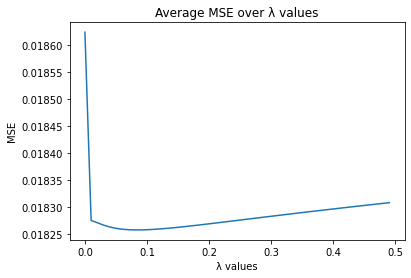

In [40]:
plt.plot(alphas,MSEs)
plt.title('Average MSE over λ values')
plt.xlabel('λ values')
plt.ylabel('MSE')
plt.show()

### Task 2.3: Ridge regression Important features:

Ridge Regression corealation values for different attributes can be further used to identify the most useful attributes. In the following steps we extracted the useful attributes and applied the ridge regression again on the cut off data set with non pruned attributes only.

mean squared error =  0.08388429803476183
Root mean squared error =  0.28962786128886464
final R2 score =  -0.6820510671083206
[ 26  11 113  74   5   3  20 101  50  68   9  86  47  19  91  16  90  99
  89  80 102  27   6  73 106 107 108  71  69  33  64  37  38  39 116 117
   2  58  55  85]


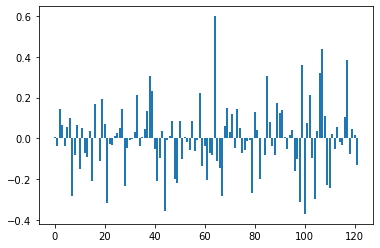

(1994, 40)
mean squared error =  0.01687897390193188
Root mean squared error =  0.12991910522294972
final R2 score =  0.6615421869338096


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
ridge_model = Ridge(alpha = alphas[bestMSEpos]).fit(x_train, y_train)
importance = ridge_model.coef_[0]
scr=r2_score(y_test,y_prediction)
MSE = mean_squared_error(y_test,y_prediction)
print('mean squared error = ',MSE)
print('Root mean squared error = ',math.sqrt(MSE))
print('final R2 score = ',scr)
ind = np.argpartition(importance, -40)[-40:]
ind[np.argsort(importance[ind])]
print(ind)
plt.bar([x for x in range(len(importance))], importance)
plt.show()
np.sum(ridge_model.coef_ >= 0)
selectedX = X[:,ind]
print(selectedX.shape)
x_traini, x_testi, y_traini, y_testi = train_test_split(selectedX, Y, test_size = 0.2, random_state = 4)
ridge_modeli = Ridge(alpha = alphas[bestMSEpos]).fit(x_traini, y_traini)
# for idx, col_name in enumerate(xcol):
#     print("The coefficient for {} is {}".format(col_name, ridge_model.coef_[0][idx]))
y_predictioni =  ridge_modeli.predict(x_testi)
score=r2_score(y_testi,y_predictioni)
meansquarederror = mean_squared_error(y_testi,y_predictioni)
print('mean squared error = ',meansquarederror)
print('Root mean squared error = ',math.sqrt(meansquarederror))
print('final R2 score = ',score)

### Task 2.3: Results with top 40 features:

While comparing the results achived from the ridge regression using the whole set of attributes with results achived using only top 40 significant features. we can see that there is only a significant difference in the overall results. The only significant differnece is between the execution times. with less features the trauncated data set perform better in execution time than that for the non tauncated data set.

In [42]:
selectedX = X[:,ind]
print(selectedX.shape)
x_train, x_test, y_train, y_test = train_test_split(selectedX, Y, test_size = 0.2, random_state = 102)
ridge_model = Ridge(alpha = alphas[bestMSEpos]).fit(x_train, y_train)
# for idx, col_name in enumerate(xcol):
#     print("The coefficient for {} is {}".format(col_name, ridge_model.coef_[0][idx]))
y_prediction =  ridge_model.predict(x_test)
score=r2_score(y_test,y_prediction)
meansquarederror = mean_squared_error(y_test,y_prediction)
print('mean squared error = ',meansquarederror)
print('Root mean squared error = ',math.sqrt(meansquarederror))
print('final R2 score = ',score)

(1994, 40)
mean squared error =  0.01953930326231311
Root mean squared error =  0.1397830578514904
final R2 score =  0.6697442337237307


### Implementing Random Forest for regression:

In this Section we Implemented the Random Forest Regression for our prediction. As it is suggested if a data set have large number of attributes (same like our case 122 attributes) .

In [45]:
df = pd.read_csv('CandC mean imputed.csv')
# df.fillna(df.mean().round(1), inplace=True)
# df.drop(df.columns[[0,1, 2, 3,4]], axis = 1, inplace = True)
xcol = df.iloc[:,:-1]
selectedX = X[:,ind]
ycol = df.iloc[:,-1:]
X=np.array(df.iloc[:,:-1].values)
Y = np.array(df.iloc[:,-1:].values)
x_train, x_test, y_train, y_test = train_test_split(selectedX, Y, test_size = 0.2, random_state = 28)
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 5000, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train.ravel()) 

# Predicting the target values of the test set
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
score=r2_score(y_test,y_prediction)
# RMSE (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nMSE:\n",mse)
print("\nRMSE:\n",rmse)
print("\nR2 score:\n",score)


MSE:
 0.02115189376265666

RMSE:
 0.14543690646688226

R2 score:
 -0.393916386568506


### Comparison of MSE for Linear Regression, Ridge Regression and Random Forest:

The following graph shows that RF and RR perform significantly better than LR. while RR is gives us the best results. RF and RR are very close while comparing their MSEs. (Note these results are extracted using the mean imputed data sets.)

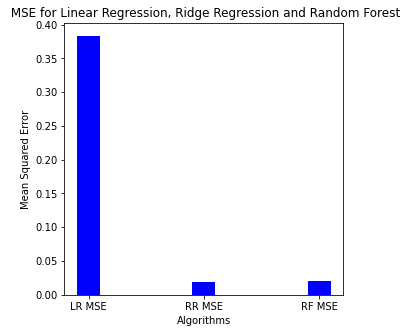

In [47]:
#MSE
data = {'LR MSE':0.38323710881729534, 'RR MSE':0.018867588670402488, 'RF MSE':  0.02115189376265666}
ImpTechnique = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(ImpTechnique, values, color ='blue',
        width = 0.2)
 
plt.xlabel("Algorithms")
plt.ylabel("Mean Squared Error")
plt.title(" MSE for Linear Regression, Ridge Regression and Random Forest")
plt.show()